# Heart Attack Prediction

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from csv import reader
from random import *
import csv
import random
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



loading the data 

In [159]:
df=pd.read_csv('heart.csv',sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data contains;

age - age in years <br>
sex - (1 = male; 0 = female)<br>
cp - chest pain type <br>
     <br> Value 0: typical angina <br>
     <br> Value 1: atypical angina <br>
     <br> Value 2: non-anginal pain <br>
     <br> Value 3: asymptomatic <br>
trtbps -  blood pressure  <br>
chol - serum cholestoral in mg/dl <br>
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
restecg - resting electrocardiographic results <br>
      <br>Value 0: normal <br>
      <br>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
      <br>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
thalachh - maximum heart rate achieved <br>
exang - exercise induced angina (1 = yes; 0 = no) <br>
oldpeak - ST depression induced by exercise relative to rest <br>
slp - the slope of the peak exercise ST segment <br>
caa - number of major vessels (0-3) colored by flourosopy <br>
thall - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
output - have disease or not (1=yes, 0=no) <br>

# Data information 

In [160]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [162]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [163]:
df.shape

(303, 14)

In [164]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Data Visualization 

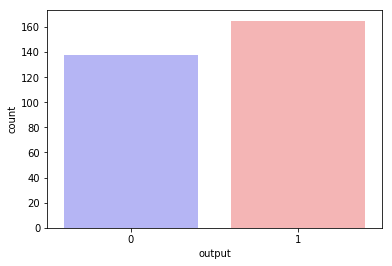

In [167]:
sns.countplot(x="output", data=df, palette="bwr")
plt.show()


In [168]:
counthave = len(df[df.output == 0])
counthavenot = len(df[df.output == 1])

print("Percentage of Patients have Heart Disease: {:.2f}%".format(round((float(counthave) / len(df.output)) *100)))
print("Percentage of Patients havenot Heart Disease: {:.2f}%".format(round((float(counthavenot) / len(df.output)) *100)))


Percentage of Patients have Heart Disease: 46.00%
Percentage of Patients havenot Heart Disease: 54.00%


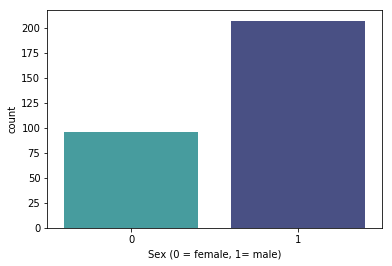

In [169]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [170]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

print("Percentage of Female Patients: {:.2f}%".format(round((float(countFemale) / len(df.sex)) *100)))
print("Percentage of Male Patients: {:.2f}%".format(round((float(countMale) / len(df.sex)) *100)))

Percentage of Female Patients: 32.00%
Percentage of Male Patients: 68.00%


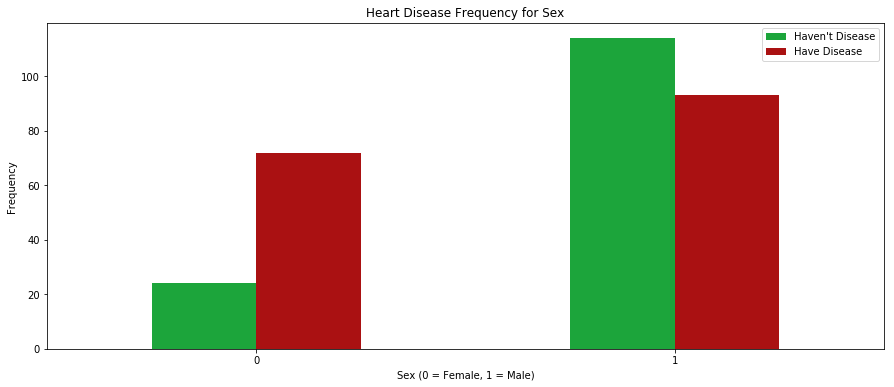

In [171]:
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1112' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [172]:
print('Female have Disease > Female haven''t')
print('male haven''t Disease > Male  have')

Female have Disease > Female havent
male havent Disease > Male  have


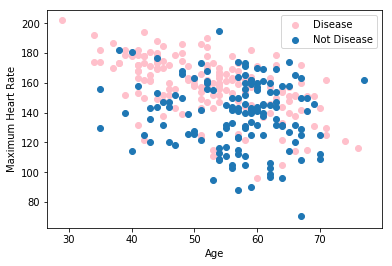

In [173]:
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="pink")
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [174]:
df_all = df.copy()

def plot_pie(column, title="All"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%',labels=data.index)
    plt.title(title)
    plt.show()

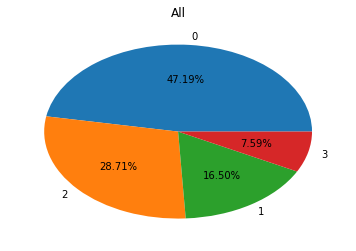

In [175]:
plot_pie('cp')


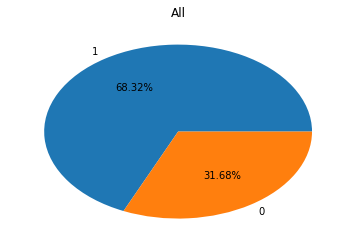

In [176]:
plot_pie('sex')

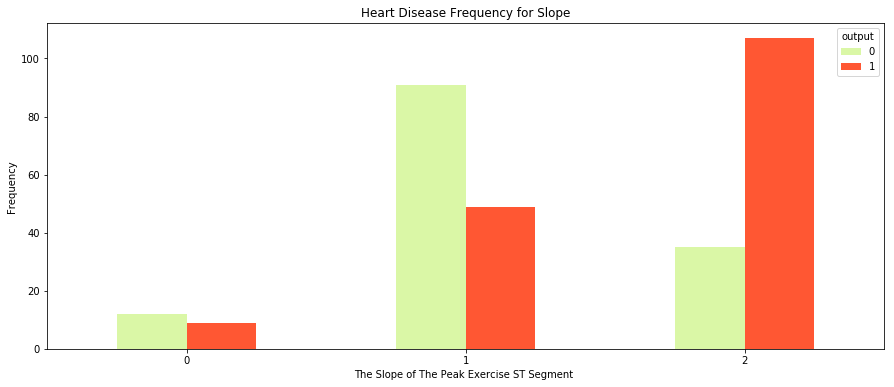

In [177]:
pd.crosstab(df.slp,df.output).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

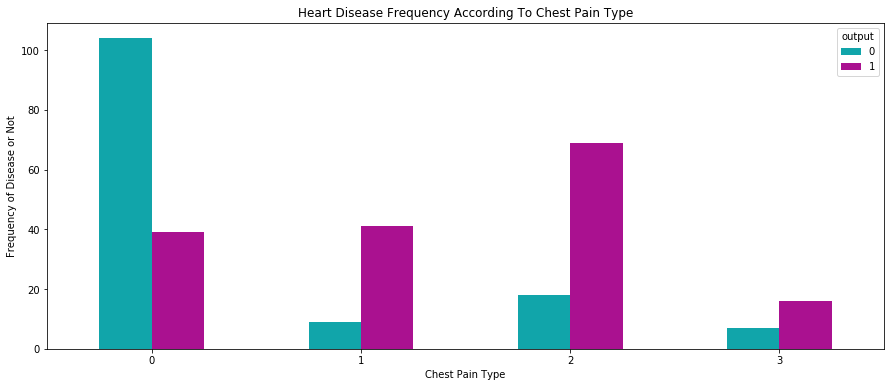

In [178]:
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

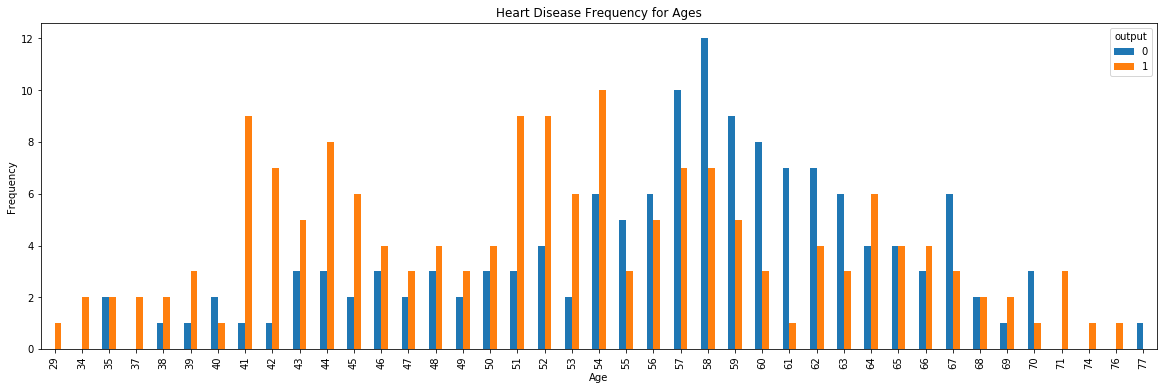

In [179]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

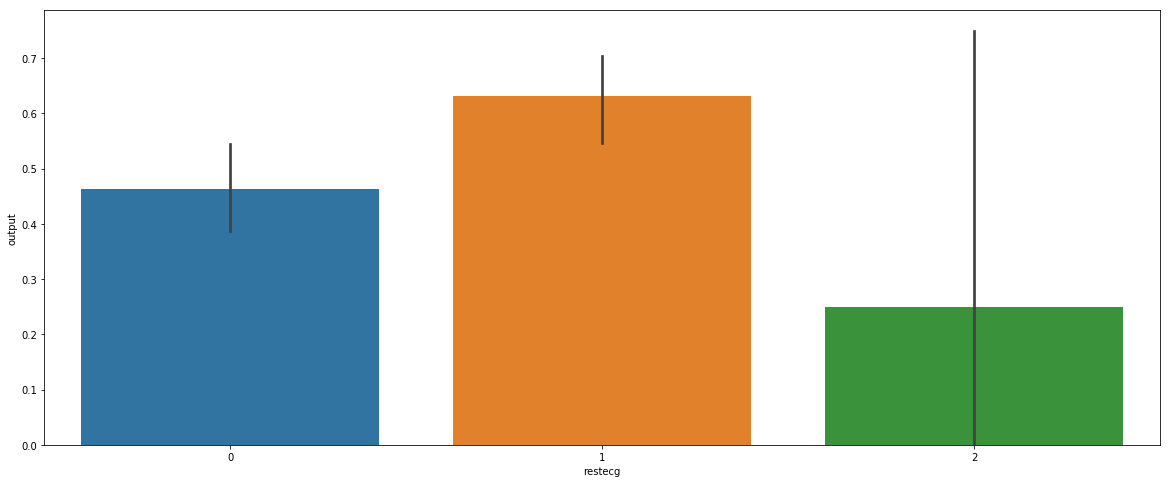

In [180]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="restecg",y="output",data=df)
plt.show()

<IPython.core.display.Javascript object>


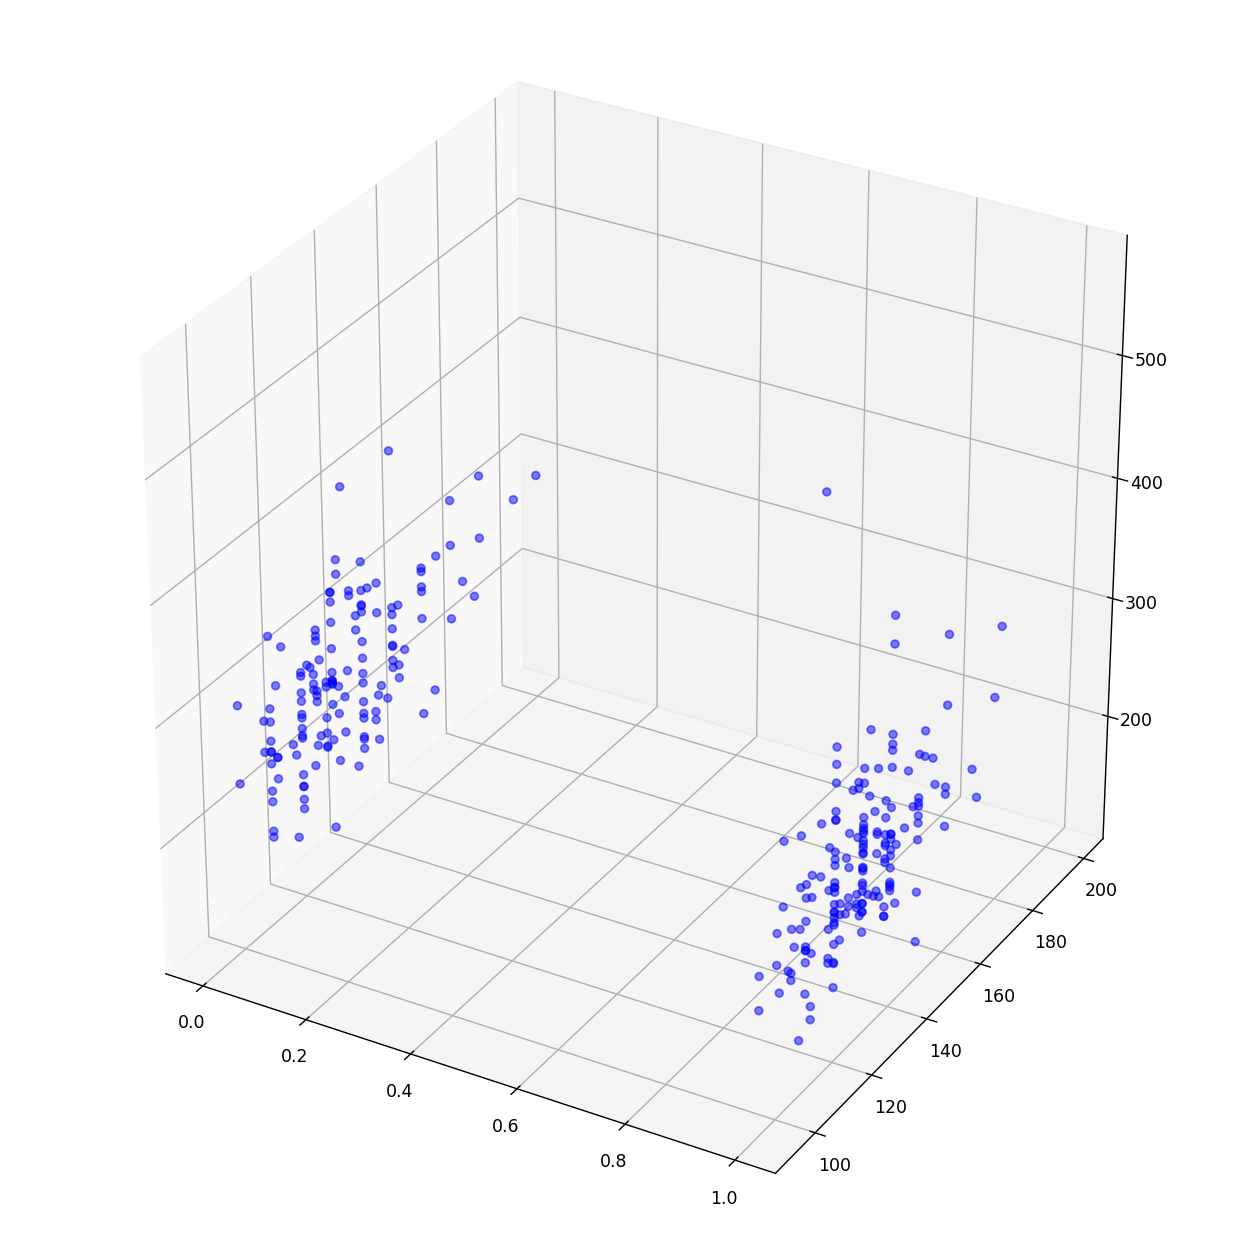

In [197]:
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(df["output"], df["trtbps"], df["chol"], c="blue", s=20, alpha=0.5)
plt.show()

# Splitting  Data 

In [182]:
y = df.output.values
x_data = df.drop(['output'], axis = 1)

In [183]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

# Logistic Regression

In [185]:
logreg = LogisticRegression()   


In [186]:
logreg.fit(x_train, y_train)  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [187]:
y_pred  = logreg.predict(x_test)    


In [188]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


# Confusion Matrix

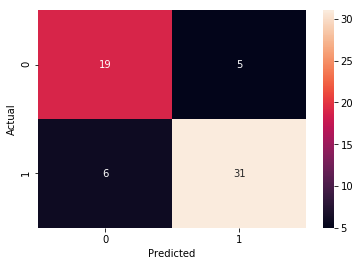

In [189]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.86      0.84      0.85        37

   micro avg       0.82      0.82      0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



# KNN

In [191]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5) #best n_neighbors=5

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [192]:
# accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7868852459016393)


# Decision tree

In [193]:
#applying tree algorithm
dtree = tree.DecisionTreeClassifier()  
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.737704918033


# Random Forest 

In [194]:

clf=RandomForestClassifier(n_estimators=1000)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

('Accuracy:', 0.8360655737704918)


# The best model: Random Foret 